In [19]:
from cdsgd import DSClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, accuracy_score
import wittgenstein as lw
#pca
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [20]:
Iris = load_iris()
Iris = pd.DataFrame(data= np.c_[Iris['data'] , Iris['target']], columns= Iris['feature_names'] + ['target'])
Iris_labels = Iris['target']
Iris = Iris.drop(columns=['target'])

Kmeans Silhouette Score: 0.4630420362927048 Number of Clusters: 3
DBSCAN Silhouette Score: 0.3565164814270073 Number of Clusters: 3
Agglomerative Silhouette Score: 0.4466890410285909 Number of Clusters: 3


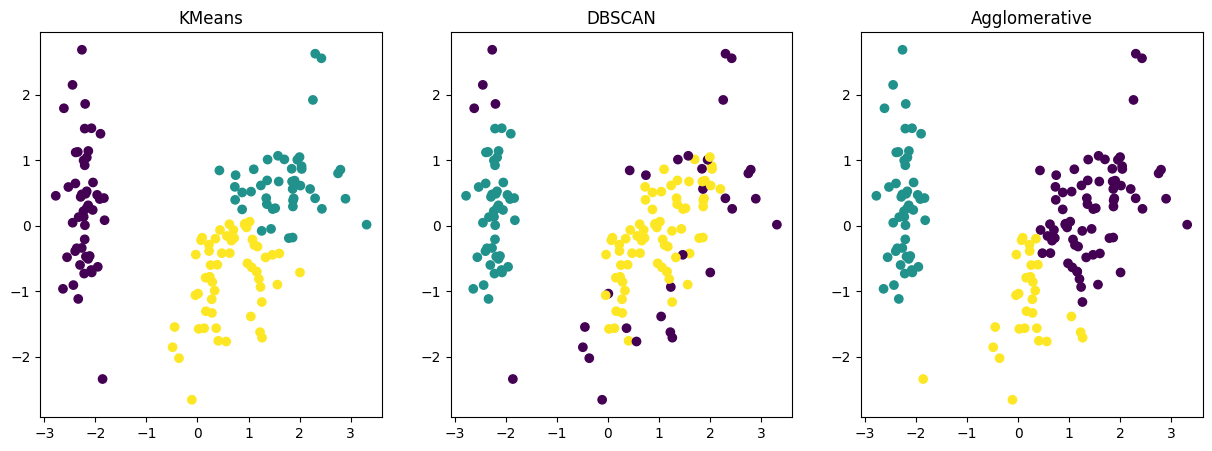

In [21]:
scaler = StandardScaler()
Iris_scaled = scaler.fit_transform(Iris)
Iris = pd.DataFrame(Iris_scaled, columns=Iris.columns)
models = []
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(Iris)
models.append({'model': kmeans, 'name': 'KMeans', 'labels': kmeans_labels})
print('Kmeans Silhouette Score:', silhouette_score(Iris, kmeans_labels), "Number of Clusters:", len(np.unique(kmeans_labels)))

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(Iris)
models.append({'model': dbscan, 'name': 'DBSCAN', 'labels': dbscan_labels})
print('DBSCAN Silhouette Score:', silhouette_score(Iris, dbscan_labels), "Number of Clusters:", len(np.unique(dbscan_labels)))

agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(Iris)
models.append({'model': agg, 'name': 'Agglomerative', 'labels': agg_labels})
print('Agglomerative Silhouette Score:', silhouette_score(Iris, agg_labels), "Number of Clusters:", len(np.unique(agg_labels)))

# visualize the clusters
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, model in enumerate(models):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(Iris)
    ax[i].scatter(pca_result[:, 0], pca_result[:, 1], c=model['labels'], cmap='viridis')
    ax[i].set_title(model['name'])
plt.show()

## Lime

In [22]:
clustterToExplain = 1
i = 100 # instance to explain

#KMeans
y = (kmeans_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(Iris, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(Iris, y)
print('KMeans Accuracy:', accuracy_score(y, clf.predict(Iris)))
explainer = LimeTabularExplainer(Iris.values, mode='classification', feature_names=Iris.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(Iris.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

#DBSCAN
y = (dbscan_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(Iris, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(Iris, y)
print('DBSCAN Accuracy:', accuracy_score(y, clf.predict(Iris)))
explainer = LimeTabularExplainer(Iris.values, mode='classification', feature_names=Iris.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(Iris.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

#Agglomerative
y = (agg_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(Iris, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(Iris, y)
print('Agglomerative Accuracy:', accuracy_score(y, clf.predict(Iris)))
explainer = LimeTabularExplainer(Iris.values, mode='classification', feature_names=Iris.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(Iris.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

KMeans Accuracy: 0.98


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


DBSCAN Accuracy: 0.7666666666666667


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Agglomerative Accuracy: 1.0


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Decision tree

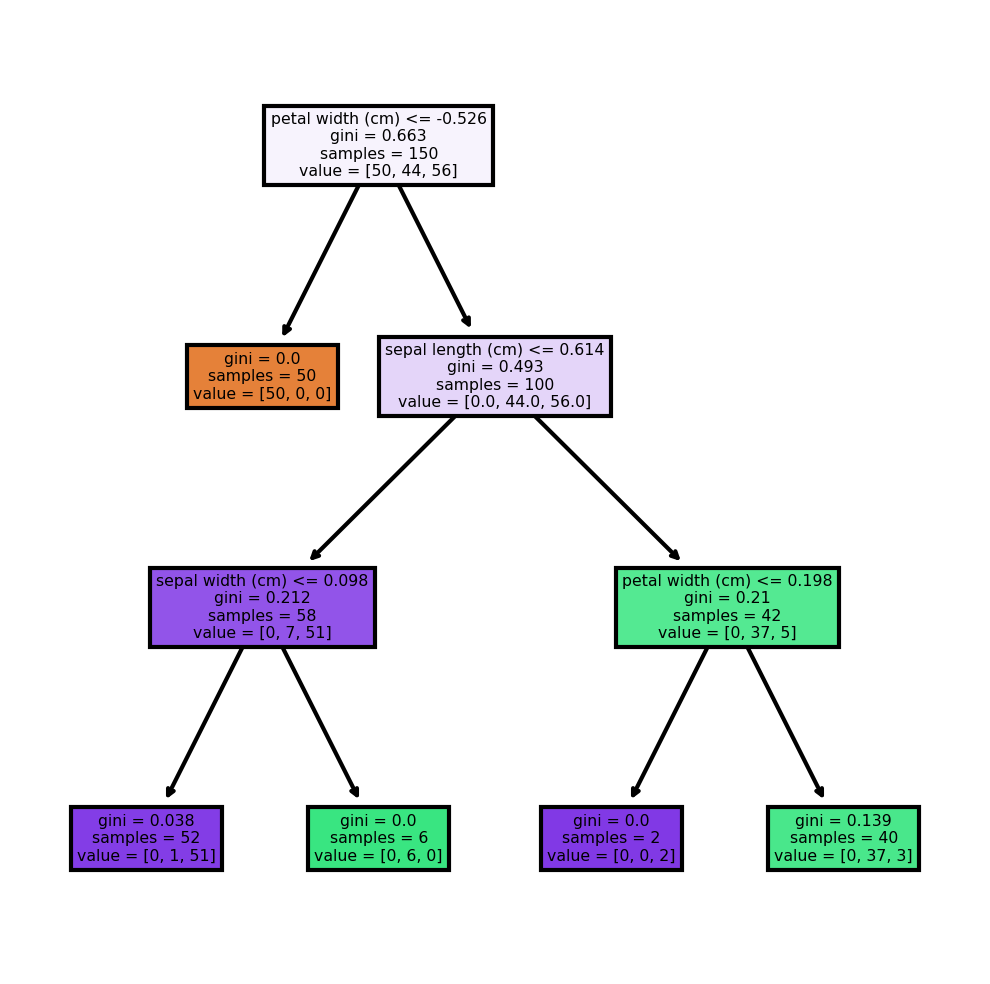

Decision Tree Accuracy: 0.9733333333333334


In [23]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(Iris, kmeans_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Iris.columns)
plt.show()
y_pred = dt.predict(Iris)
print('Decision Tree Accuracy:', accuracy_score(kmeans_labels, y_pred))


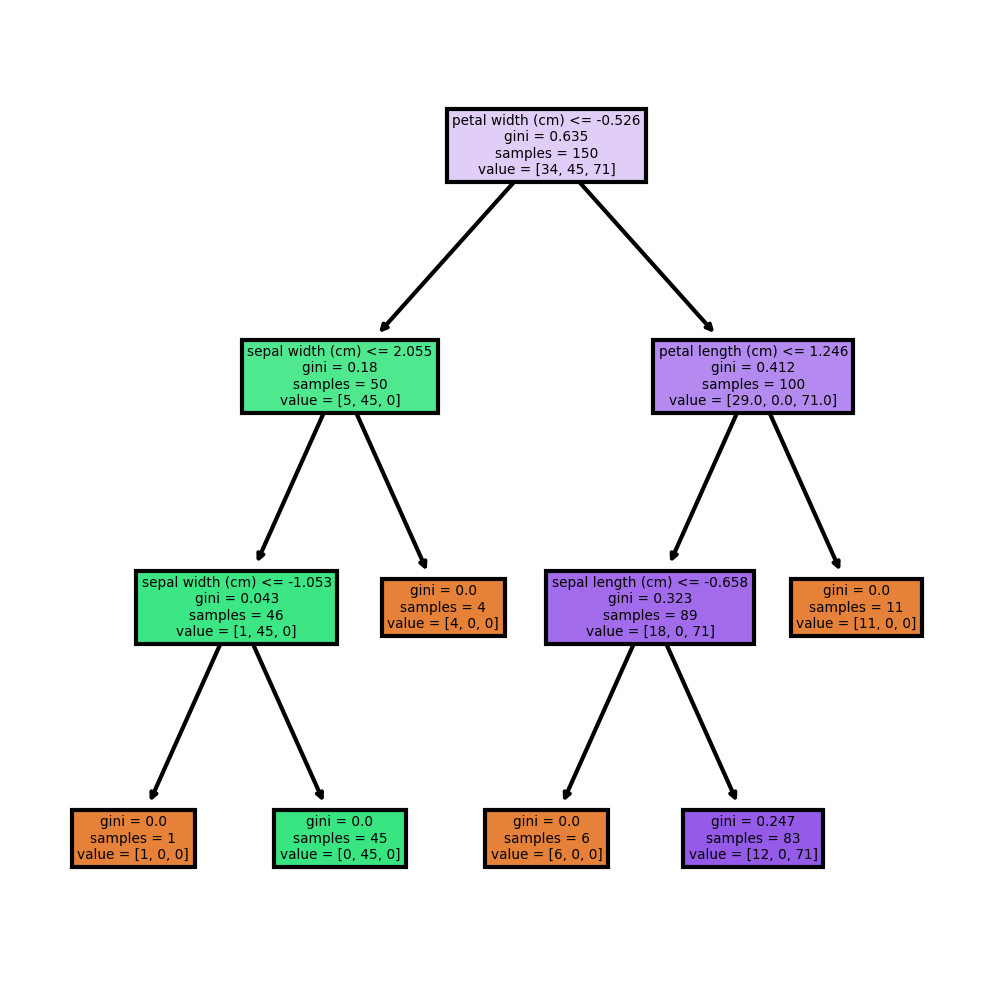

Decision Tree Accuracy: 0.92


In [24]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(Iris, dbscan_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Iris.columns)
plt.show()
y_pred = dt.predict(Iris)
print('Decision Tree Accuracy:', accuracy_score(dbscan_labels, y_pred))

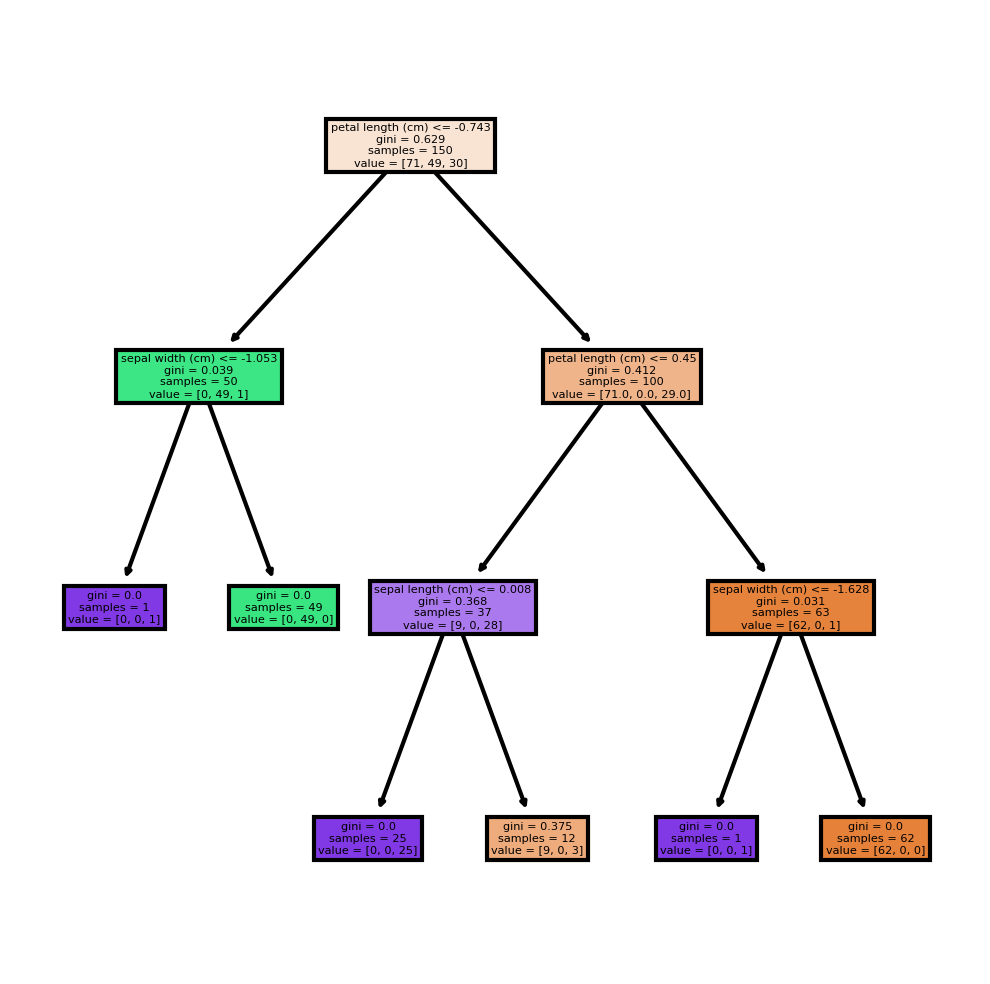

Decision Tree Accuracy: 0.98


In [25]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(Iris, agg_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Iris.columns)
plt.show()
y_pred = dt.predict(Iris)
print('Decision Tree Accuracy:', accuracy_score(agg_labels, y_pred))

# RIPPER

In [26]:
pos = 1
# cambiamos las etiquetas para que el positivo sea el cluster 0
kmeans_labels_pos = (kmeans_labels == pos).astype(int)
dbscan_labels_pos = (dbscan_labels == pos).astype(int)
agg_labels_pos = (agg_labels == pos).astype(int)
# KMeans
ripper = lw.RIPPER()
df = pd.concat([Iris, pd.DataFrame(kmeans_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Iris)
print('RIPPER Accuracy KMeans:', accuracy_score(kmeans_labels_pos, y_pred))
# DBSCAN
ripper = lw.RIPPER()
df = pd.concat([Iris, pd.DataFrame(dbscan_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Iris)
print('RIPPER Accuracy DBSCAN:', accuracy_score(dbscan_labels_pos, y_pred))
# Agglomerative
ripper = lw.RIPPER()
df = pd.concat([Iris, pd.DataFrame(agg_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Iris)
print('RIPPER Accuracy Agglomerative:', accuracy_score(agg_labels_pos, y_pred))

[[sepallength(cm)=>1.28] V [petallength(cm)=0.89-1.16] V [sepallength(cm)=0.82-1.28] V [sepallength(cm)=0.55-0.82^sepalwidth(cm)=0.098-0.33] V [sepallength(cm)=0.55-0.82^sepalwidth(cm)=0.33-0.79] V [petalwidth(cm)=0.92-1.32^sepalwidth(cm)=-0.59--0.13]]
RIPPER Accuracy KMeans: 0.9666666666666667
[[petalwidth(cm)=0.13-0.4] V [sepalwidth(cm)=-1.28--0.82] V [petallength(cm)=0.89-1.16] V [petallength(cm)=0.5-0.71] V [sepallength(cm)=0.55-0.82] V [petalwidth(cm)=>1.32^sepalwidth(cm)=0.098-0.33] V [petalwidth(cm)=-1.05--0.052^sepallength(cm)=-0.69--0.29]]
RIPPER Accuracy DBSCAN: 0.9066666666666666
[[petalwidth(cm)=-1.32--1.05] V [petalwidth(cm)=<-1.32] V [petallength(cm)=-1.28--1.17]]
RIPPER Accuracy Agglomerative: 0.9866666666666667


## DSClustering

Optimization started
Processing epoch	125	0.0023	

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Training time: 3.57s, epochs: 153

Least training loss reached: 0.001


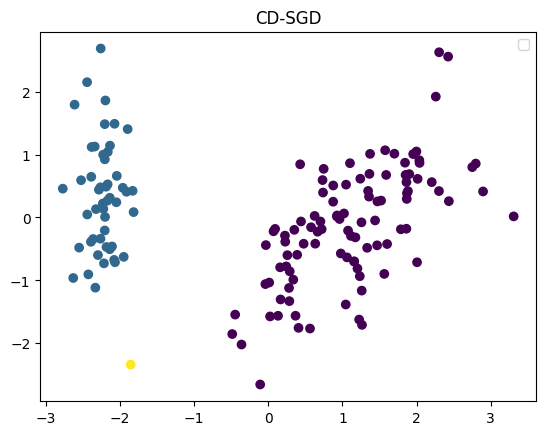

In [27]:
cdsgd = DSClustering(data=Iris)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD', 'labels': cdsgd_labels})
#vvisualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Iris)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cdsgd_labels, cmap='viridis')
plt.title('CD-SGD')
plt.legend()
plt.show()

In [28]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.346] R14: sepal width (cm) < -0.748
			0: 0.262	1: 0.000	2: 0.000	3: 0.196	Unc: 0.542

	[0.323] R24: 0.157 < petal width (cm) < 0.806
			0: 0.323	1: 0.000	2: 0.000	3: 0.000	Unc: 0.677

	[0.289] R13: sepal length (cm) > 0.810
			0: 0.289	1: 0.000	2: 0.000	3: 0.000	Unc: 0.711

	[0.279] R12: 0.107 < sepal length (cm) < 0.810
			0: 0.279	1: 0.000	2: 0.000	3: 0.000	Unc: 0.721

	[0.261] R23: -0.493 < petal width (cm) < 0.157
			0: 0.261	1: 0.000	2: 0.000	3: 0.000	Unc: 0.739

	[0.259] R21: petal length (cm) > 0.813
			0: 0.259	1: 0.000	2: 0.000	3: 0.000	Unc: 0.741

	[0.250] R40: Negative sepal length (cm) - 0.107, petal width (cm) - 0.157
			0: 0.250	1: 0.000	2: 0.000	3: 0.000	Unc: 0.750

	[0.242] R20: 0.168 < petal length (cm) < 0.813
			0: 0.242	1: 0.000	2: 0.000	3: 0.000	Unc: 0.758

	[0.241] R15: -0.748 < sepal width (cm) < -0.170
			0: 0.233	1: 0.017	2: 0.000	3: 0.000	Unc: 0.750

	[0.218] R19: -0.477 < petal length (cm) < 0.168
			0: 0.218	1: 0.00

Optimization started
Processing epoch	1	1.0000	

c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\cdsgd\ClusteringSelector.py:248: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  row_modes[0][x] = self.get_best_labels()[x]


Processing epoch	373	0.0002	

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Training time: 9.34s, epochs: 400

Least training loss reached: 0.000


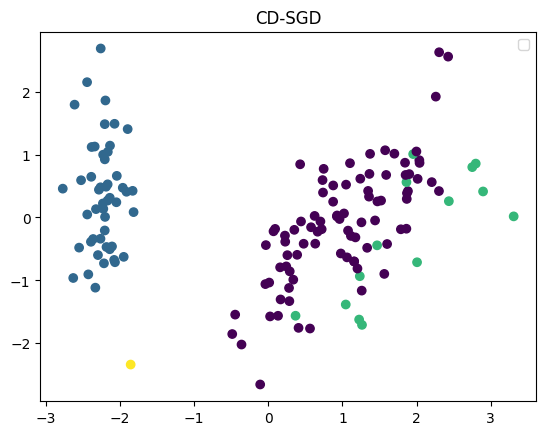

In [29]:
cdsgd = DSClustering(data=Iris, most_voted=True)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD más votado', 'labels': cdsgd_labels})
#vvisualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Iris)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cdsgd_labels, cmap='viridis')
plt.title('CD-SGD')
plt.legend()
plt.show()

In [30]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.526] R24: 0.157 < petal width (cm) < 0.806
			0: 0.397	1: 0.000	2: 0.301	3: 0.000	Unc: 0.303

	[0.486] R14: sepal width (cm) < -0.748
			0: 0.243	1: 0.000	2: 0.362	3: 0.364	Unc: 0.030

	[0.435] R12: 0.107 < sepal length (cm) < 0.810
			0: 0.384	1: 0.000	2: 0.108	3: 0.000	Unc: 0.508

	[0.430] R21: petal length (cm) > 0.813
			0: 0.320	1: 0.000	2: 0.260	3: 0.000	Unc: 0.420

	[0.424] R19: -0.477 < petal length (cm) < 0.168
			0: 0.424	1: 0.000	2: 0.000	3: 0.000	Unc: 0.576

	[0.421] R11: -0.596 < sepal length (cm) < 0.107
			0: 0.268	1: 0.394	2: 0.000	3: 0.000	Unc: 0.339

	[0.400] R20: 0.168 < petal length (cm) < 0.813
			0: 0.304	1: 0.000	2: 0.223	3: 0.000	Unc: 0.473

	[0.375] R13: sepal length (cm) > 0.810
			0: 0.251	1: 0.000	2: 0.309	3: 0.000	Unc: 0.440

	[0.342] R25: petal width (cm) > 0.806
			0: 0.306	1: 0.000	2: 0.075	3: 0.000	Unc: 0.619

	[0.304] R15: -0.748 < sepal width (cm) < -0.170
			0: 0.269	1: 0.075	2: 0.000	3: 0.000	Unc: 0.656

	[0

Optimization started
Processing epoch	373	0.0003	

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Training time: 8.91s, epochs: 400

Least training loss reached: 0.000


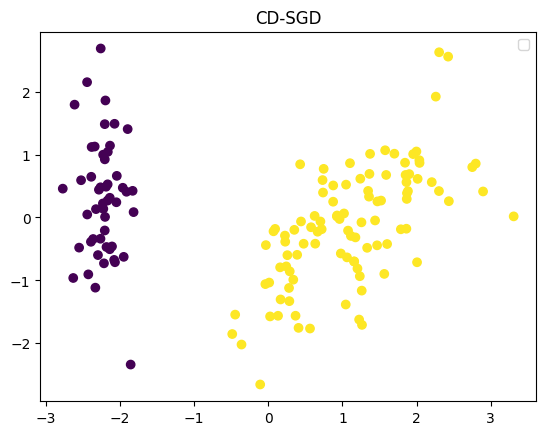

In [31]:
cdsgd = DSClustering(data=Iris,cluster=3)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD con 3 clusters', 'labels': cdsgd_labels})
#vvisualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Iris)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cdsgd_labels, cmap='viridis')
plt.title('CD-SGD')
plt.legend()
plt.show()

In [32]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.516] R20: petal width (cm) < -0.493
			0: 0.516	1: 0.000	2: 0.000	Unc: 0.484

	[0.458] R15: sepal width (cm) > 0.407
			0: 0.458	1: 0.000	2: 0.000	Unc: 0.542

	[0.391] R16: petal length (cm) < -0.477
			0: 0.391	1: 0.000	2: 0.000	Unc: 0.609

	[0.313] R8: sepal length (cm) < -0.596
			0: 0.313	1: 0.000	2: 0.000	Unc: 0.687

	[0.257] R46: Negative sepal width (cm) - -0.170, petal width (cm) - 0.157
			0: 0.249	1: 0.017	2: 0.000	Unc: 0.734

	[0.245] R9: -0.596 < sepal length (cm) < 0.107
			0: 0.231	1: 0.028	2: 0.000	Unc: 0.741

	[0.244] R32: Negative sepal length (cm) - 0.107, sepal width (cm) - -0.170
			0: 0.217	1: 0.057	2: 0.000	Unc: 0.726

	[0.215] R44: Negative sepal width (cm) - -0.170, petal length (cm) - 0.168
			0: 0.164	1: 0.119	2: 0.000	Unc: 0.718

	[0.208] R33: Positive sepal length (cm) - 0.107, petal length (cm) - 0.168
			0: 0.165	1: 0.096	2: 0.000	Unc: 0.738

	[0.200] R35: Positive sepal length (cm) - 0.107, petal width (cm) - 0.15

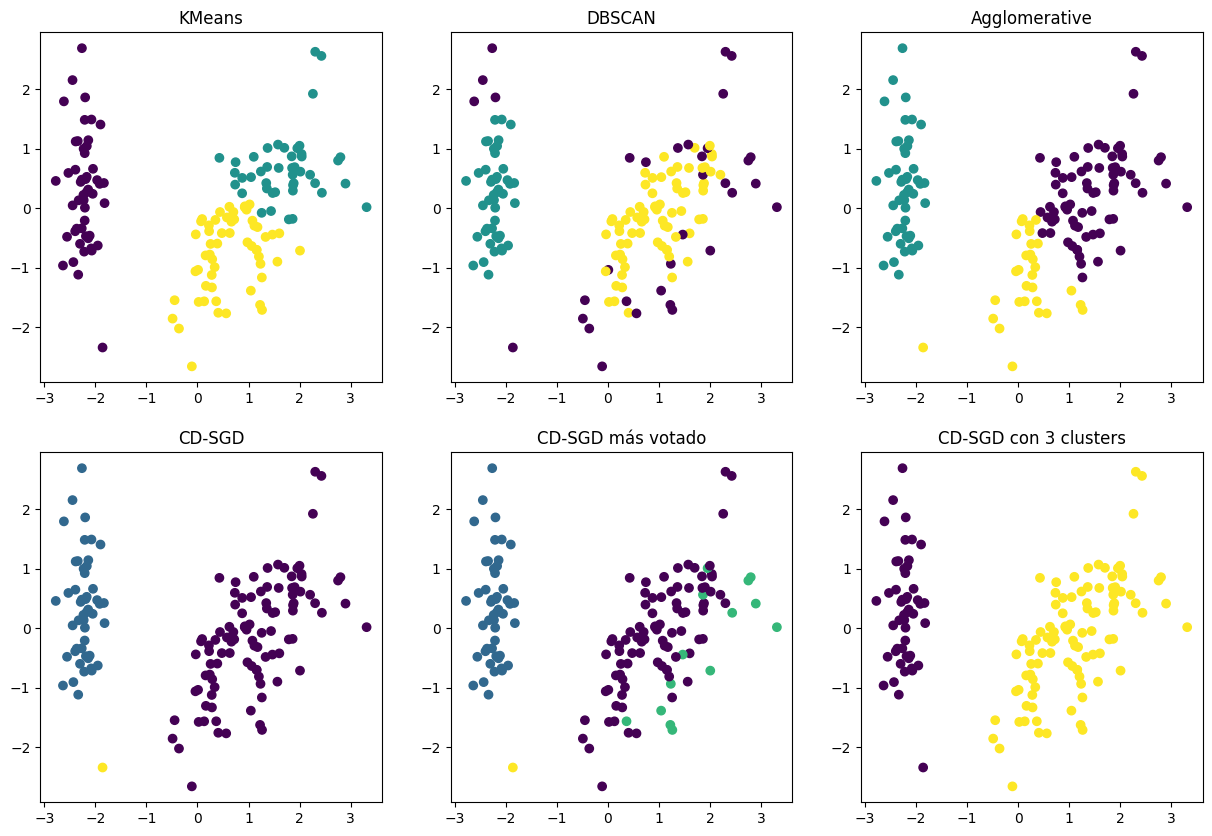

In [33]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, model in enumerate(models):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(Iris)
    ax[i//3, i%3].scatter(pca_result[:, 0], pca_result[:, 1], c=model['labels'], cmap='viridis')
    ax[i//3, i%3].title.set_text(model['name'])
plt.show()